In [453]:
# Import libraries
import pandas as pd
import numpy
import warnings

# suppress warnings
warnings.filterwarnings("ignore")

### Data Import

In [454]:
# Read the CSV file
df =  pd.read_csv("Unicorn_Companies.csv")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Inspecting the dataframe

In [455]:
df.shape

(1074, 10)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [457]:
# Converting datatype of "Date Joined" to datetime datatype
df["Date Joined"] = df["Date Joined"].astype("datetime64[ns]")

In [458]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


### Missing values

In [459]:
# Finding missing values
# number of null values in each column

df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [460]:
df[df.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


<div class="alert alert-block alert-success">
<b>Observation:</b> 

Most of the companies with missing value in City column are from the Asian continent, and it was either founded in Hong Kong or Singapore
</div>

In [461]:
df[df.Country=="Hong Kong"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
56,Lalamove,$10B,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,$2B,"MindWorks Ventures, Shunwei Capital Partners, ..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
595,Trendy Group International,$2B,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,$200M,L Capital Partners
720,Klook,$1B,2018-08-07,Travel,Central,Hong Kong,Asia,2014,$722M,"Sequoia Capital China, Goldman Sachs, Matrix P..."
893,Cider,$1B,2021-09-02,E-commerce & direct-to-consumer,NaN,Hong Kong,Asia,2020,$140M,"Andreessen Horowitz, DST Global, IDG Capital"
1061,WeLab,$1B,2017-11-08,Fintech,NaN,Hong Kong,Asia,2013,$871M,"Sequoia Capital China, ING, Alibaba Entreprene..."


In [462]:
df[df.Country=="Singapore"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."
889,Carro,$1B,2021-06-14,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$595M,"SingTel Innov8, Alpha JWC Ventures, Golden Gat..."
980,NIUM,$1B,2021-07-13,Fintech,NaN,Singapore,Asia,2014,$285M,"Vertex Ventures SE Asia, Global Founders Capit..."


In [463]:
df[df.Country=="Bahamas"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"


In [464]:
# Dropping rows with missing values
# df.dropna(inplace = True)
# df.shape

In [465]:
# check value counts 
# check unique values

In [466]:
# check non-numerical values in Funding column 
df["Funding"].value_counts()

$1B        60
$2B        30
Unknown    12
$200M      12
$4B         9
           ..
$717M       1
$101M       1
$19M        1
$946M       1
$620M       1
Name: Funding, Length: 539, dtype: int64

In [467]:
# check non-numerical values in Valuation column 
df["Valuation"].value_counts()

$1B      471
$2B      248
$3B      115
$4B       72
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$32B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: Valuation, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

    
- Valuation and Funding columns have B and M characters denoting billions and millions
- Funding column has unknown values
</div>

In [468]:
# Dropping rows with "Unknown" in Funding column

df = df[df["Funding"] != "Unknown"]

In [469]:
df["Funding"].value_counts()

$1B      60
$2B      30
$200M    12
$4B       9
$3B       7
         ..
$717M     1
$101M     1
$19M      1
$946M     1
$620M     1
Name: Funding, Length: 538, dtype: int64

In [470]:
df["Industry"].value_counts(normalize=True)*100

Fintech                                20.903955
Internet software & services           19.114878
E-commerce & direct-to-consumer        10.263653
Health                                  6.967985
Artificial intelligence                 6.873823
Other                                   5.273070
Supply chain, logistics, & delivery     5.273070
Cybersecurity                           4.708098
Data management & analytics             3.766478
Mobile & telecommunications             3.483992
Hardware                                3.201507
Auto & transportation                   2.919021
Edtech                                  2.636535
Consumer & retail                       2.259887
Travel                                  1.318267
Artificial Intelligence                 1.035782
Name: Industry, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 
Duplicate values of "Artificial Intelligence" 
</div>

In [471]:
df["City"].value_counts(normalize=True)*100

San Francisco    14.531549
New York          9.751434
Beijing           5.927342
Shanghai          4.110899
London            3.250478
                   ...    
Lysaker           0.095602
Richmond          0.095602
Santa Barbara     0.095602
Altrincham        0.095602
Milpitas          0.095602
Name: City, Length: 253, dtype: float64

In [472]:
df["Country"].value_counts(normalize=True)*100

United States           52.259887
China                   16.007533
India                    6.120527
United Kingdom           4.048964
Germany                  2.448211
France                   2.165725
Israel                   1.883239
Canada                   1.694915
Brazil                   1.506591
Singapore                1.129944
South Korea              1.129944
Australia                0.753296
Hong Kong                0.564972
Mexico                   0.564972
Indonesia                0.564972
Netherlands              0.564972
Sweden                   0.564972
Switzerland              0.470810
Japan                    0.470810
Ireland                  0.470810
Finland                  0.376648
Norway                   0.376648
United Arab Emirates     0.282486
Turkey                   0.282486
Spain                    0.282486
Belgium                  0.282486
Chile                    0.188324
South Africa             0.188324
Philippines              0.188324
Thailand      

In [473]:
df["Continent"].value_counts(normalize=True)*100

North America    54.708098
Asia             28.907721
Europe           13.370998
South America     1.977401
Oceania           0.753296
Africa            0.282486
Name: Continent, dtype: float64

In [474]:
df["Company"].value_counts()

Bolt             2
Bytedance        1
Klook            1
Rebel Foods      1
Salt Security    1
                ..
CFGI             1
Cgtz             1
Changingedu      1
eDaili           1
Zwift            1
Name: Company, Length: 1061, dtype: int64

In [475]:
df["Company"].unique().size

1061

In [476]:
df[df["Company"] == "Bolt"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


<div class="alert alert-block alert-success">
<b>Observation:</b> 
Duplicate values of "Bolt" companies founded in different countries and belonging to different industries
</div>

In [477]:
df['Year Founded'].value_counts(normalize=True)*100

2015    14.500942
2016    10.357815
2014    10.263653
2012     8.851224
2013     8.097928
2011     7.721281
2017     6.873823
2018     5.743879
2019     4.048964
2010     3.672316
2009     3.201507
2008     2.542373
2020     2.259887
2007     2.259887
2006     1.412429
2005     1.318267
2021     1.035782
2000     1.035782
1999     0.753296
2004     0.753296
2001     0.659134
2003     0.659134
1998     0.470810
2002     0.282486
1994     0.188324
1995     0.188324
1996     0.094162
1919     0.094162
1991     0.094162
1979     0.094162
1992     0.094162
1984     0.094162
1990     0.094162
1993     0.094162
1997     0.094162
Name: Year Founded, dtype: float64

In [478]:
df['Select Investors'].value_counts(normalize=True)*100

Greylock Partners, Google Ventures, BlackRock                    0.188501
Insight Partners, Sequoia Capital, Index Ventures                0.188501
Global Founders Capital, Shea Ventures, Greycroft                0.188501
Speedinvest, Valar Ventures, Uniqa Ventures                      0.188501
General Atlantic                                                 0.188501
                                                                   ...   
DeFi Technologies, Hypersphere Ventures, M13                     0.094251
Octopus Ventures, Munich Re Ventures, CommerzVentures            0.094251
Alibaba Group,Co-Stone Venture Capital, Buhuo Venture Capital    0.094251
The Carlyle Group, CVC Capital Partners                          0.094251
Novator Partners, True, Causeway Media Partners                  0.094251
Name: Select Investors, Length: 1047, dtype: float64

In [479]:
type(df['Select Investors'])

pandas.core.series.Series

In [480]:
df['Select Investors'].unique()

array(['Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group',
       'Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures',
       'Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners',
       ...,
       'Xingwang Investment Management, China Capital Investment Group, Matrix Partners China',
       'IAG Capital Partners, Augmentum Fintech, Northzone Ventures',
       'Novator Partners, True, Causeway Media Partners'], dtype=object)

### Data cleaning

In [481]:
# Removing "$" and "B" from Valuation column

df.Valuation = df.Valuation.str.replace("$","")
df.Valuation = df.Valuation.str.replace("B",'0'*9)

In [482]:
# Removing "$", "B", "M" and "Unknown" from Funding column

df.Funding = df.Funding.str.replace("$","")
df.Funding = df.Funding.str.replace("B",'0'*9)
df.Funding = df.Funding.str.replace("M",'0'*6)
df.Funding = df.Funding.str.replace("Unknown",'NaN')

In [483]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100000000000,2012-12-01,Other,Hawthorne,United States,North America,2002,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100000000000,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000000000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95000000000,2014-01-23,Fintech,San Francisco,United States,North America,2010,2000000000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46000000000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000000000,"Institutional Venture Partners, Sequoia Capita..."


In [484]:
# Converting Valuation and Funding columns to float type

df.Funding = df.Funding.astype(float)
df.Valuation = df.Valuation.astype(float)

In [485]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [486]:
# Replace intelligence with Intelligence in Industry column

df.Industry = df.Industry.str.replace("intelligence", "Intelligence")

In [487]:
# Replace the duplicated company names
df.loc[40,"Company"] = 'Bolt (Estonia)'
df.loc[44,"Company"] = 'Bolt (United States)'

### Feature engineering

In [488]:
# Split investors and convert to list
df["Select Investors"] = df["Select Investors"].str.split(", ")

In [489]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,"[Sequoia Capital China, SIG Asia Investments, ..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"[Founders Fund, Draper Fisher Jurvetson, Rothe..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"[Tiger Global Management, Sequoia Capital Chin..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"[Khosla Ventures, LowercaseCapital, capitalG]"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"[Institutional Venture Partners, Sequoia Capit..."


In [490]:
# Explode "Select Investors" to individual list
df = df.explode("Select Investors")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Sequoia Capital China
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,SIG Asia Investments
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Sina Weibo
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Softbank Group
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,Founders Fund


In [491]:
df["Select Investors"].value_counts()

Accel                       60
Andreessen Horowitz         53
Tiger Global Management     53
Sequoia Capital China       47
Insight Partners            46
                            ..
Go-Ventures                  1
Lockheed Martin Ventures     1
GAM Holding                  1
HOF Capital                  1
Causeway Media Partners      1
Name: Select Investors, Length: 1250, dtype: int64

In [492]:
df.describe()

,Valuation,Year Founded,Funding
count,3.021000e+03,3021.000000,3.021000e+03
mean,3.572989e+09,2013.131744,5.558338e+08
std,9.329245e+09,4.995480,7.565564e+08
min,1.000000e+09,1919.000000,0.000000e+00
25%,1.000000e+09,2011.000000,2.250000e+08
50%,2.000000e+09,2014.000000,3.710000e+08
75%,3.000000e+09,2016.000000,6.120000e+08
max,1.800000e+11,2021.000000,1.400000e+10


<div class="alert alert-block alert-success">
<b>Observation: Valuation</b> 
    
- Maximum valuation: 180 billion dollars
- Minimum valuation: 1 billion dollars
</div>

<div class="alert alert-block alert-success">
<b>Observation: Year Founded</b> 
    
- Companies founded in 2021 have also attained a valuation of more than $1 billion
</div>

In [493]:
# The year in which the company reached $1 billion in valuation
df["Year Joined"] = df["Date Joined"].dt.year

In [494]:
df["Year Joined"].value_counts()

2021    1499
2022     343
2020     301
2019     283
2018     282
2017     115
2015      92
2016      47
2014      36
2012      10
2013       8
2011       5
Name: Year Joined, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation: Year Joined</b> 
    
- Maximum number of companies attained a valuation of more than $1 billion in 2021
</div>

In [495]:
# "Valuation-to-funding ratio" -> ROI
df["ROI"] = (df["Valuation"] - df["Funding"]) / df["Funding"]

In [496]:
df["ROI"].value_counts()

2.000000      53
4.000000      49
3.000000      43
9.000000      26
5.000000      19
              ..
8.302326       1
6.177033       1
110.111111     1
2.816794       1
18.230769      1
Name: ROI, Length: 655, dtype: int64

In [497]:
# Companies with negative or 0 ROI

df[ df.ROI <= 0 ]["Company"].unique()

array(['Magic Leap', 'Fair', 'OVH', 'Snapdeal', 'SumUp',
       'Hello TransTech', 'Leap Motor', 'Momenta', 'REEF Technology',
       'SaltPay'], dtype=object)

In [498]:
# Time taken to reach $1 billion in valuation
df["Duration to become Unicorn"] = df["Year Joined"] - df["Year Founded"]

In [499]:
df["Duration to become Unicorn"].value_counts()

 6     402
 5     382
 4     348
 7     309
 3     284
 8     252
 2     176
 10    175
 9     146
 1      97
 11     96
 14     55
 13     51
 12     47
 17     27
 16     27
 0      27
 15     24
 19     17
 22     15
 20     15
 21     13
 18     12
 37      5
 25      4
 27      4
 26      3
 28      3
 24      2
-4       2
 98      1
Name: Duration to become Unicorn, dtype: int64

In [500]:
# Checking company with -4 value in "Duration to become Unicorn" column 

df[ df["Duration to become Unicorn"] < 0 ]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,ROI,Duration to become Unicorn
714,Yidian Zixun,1.000000e+09,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,151000000.0,Phoenix New Media,2017,5.622517,-4
714,Yidian Zixun,1.000000e+09,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,151000000.0,Tianjin Haihe Industry Fund,2017,5.622517,-4


In [501]:
# Replace value in "Year Founded" of company "Yidian Zixun" to 2013
df.loc[714, "Year Founded"] = 2013
df["Duration to become Unicorn"] = df["Year Joined"] - df["Year Founded"]

In [502]:
df["Duration to become Unicorn"].mean()

6.85633896060907

<div class="alert alert-block alert-success">
<b>Observation: Duration to become Unicorn</b>
    
- On an average, it takes ~7 years to become a unicorn
</div>

In [503]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,ROI,Duration to become Unicorn
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Sequoia Capital China,2017,21.500000,5
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,SIG Asia Investments,2017,21.500000,5
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Sina Weibo,2017,21.500000,5
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,Softbank Group,2017,21.500000,5
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,Founders Fund,2012,13.285714,10


<AxesSubplot:>

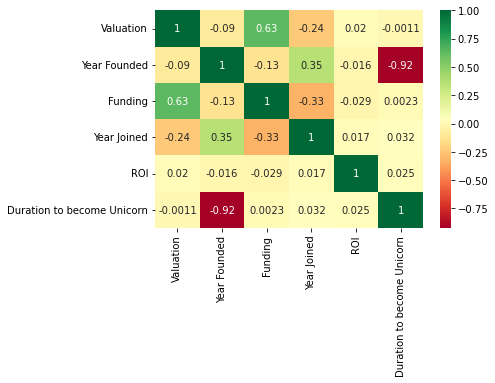

In [504]:
# Calculate correlation matrix and plot the heatmap

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', xticklabels=corr.columns, yticklabels=corr.columns)

<div class="alert alert-block alert-success">
<b>Observation: Duration to become Unicorn</b>
    
- Strong correlation between Valuation and Funding
- Year founded and Year joined
- Negative correlation between year founded and duration to become a unicorn
</div>

In [505]:
# Export the cleaned dataframe to a file
df.to_csv("Unicorn_Companies_Clean.csv", index=False)